## Obtaining the Efficient Frontier - Part II

*Suggested Answers follow (usually there are multiple ways to solve a problem in Python).*

Ok, let’s continue the exercise from the last lecture.

You already downloaded the data and generated two random weightings. 

In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
%matplotlib inline

assets = ['WMT', 'FB']
pf_data = pd.read_csv('Walmart_FB_2014_2017.csv', index_col='Date')

In [3]:
pf_data.head()

WMT         FB
Date                            
2013-12-31  71.126411  54.650002
2014-01-02  71.325287  54.709999
2014-01-03  71.090279  54.560001
2014-01-06  70.692558  57.200001
2014-01-07  70.909485  57.919998

<AxesSubplot:xlabel='Date'>

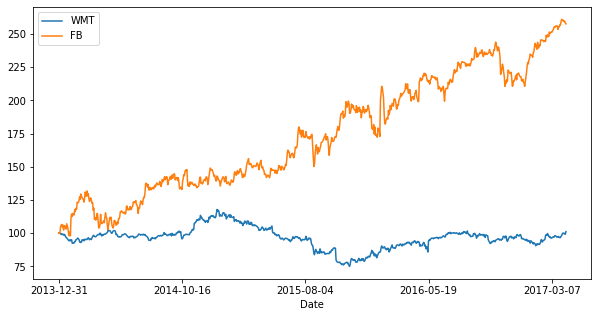

In [4]:
(pf_data / pf_data.iloc[0] * 100).plot(figsize=(10, 5))

In [5]:
log_returns = np.log(pf_data / pf_data.shift(1))

num_assets = len(assets)

weights = np.random.random(num_assets)
weights /= np.sum(weights)
weights

array([0.79771385, 0.20228615])

Now, estimate the expected Portfolio Return, Variance, and Volatility.

Expected Portfolio Return:

In [6]:
np.sum(weights * log_returns.mean()) * 250

0.060977592695346326

Expected Portfolio Variance:

In [7]:
np.dot(weights.T, np.dot(log_returns.cov() * 250, weights))

0.02629307728737375

Expected Portfolio Volatility:

In [8]:
np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 250, weights)))

0.16215140236018236

***

The rest of this exercise will be a reproduction of what we did in the previous video.

1)	Create two empty lists. Name them pf_returns and pf_volatilites.

In [12]:
pf_returns = []
pf_volatilities = []

2)	Create a loop with 1,000 iterations that will generate random weights, summing to 1, and will append the obtained values for the portfolio returns and the portfolio volatilities to pf_returns and pf_volatilities, respectively.

In [14]:
for x in range(1000):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    pf_returns.append(np.sum(weights * log_returns.mean()) * 250)
    pf_volatilities.append(np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 250, weights))))
    
pf_returns, pf_volatilities

([0.14336945686659763,
  0.27742303085044984,
  0.23372217282419122,
  0.19051793630760822,
  0.1911065128844956,
  0.06952554309390034,
  0.15778139386873935,
  0.2793276084034202,
  0.20778230895964844,
  0.10975273083401216,
  0.16987823181747339,
  0.01065091896170467,
  0.10473439186840625,
  0.2182174184011803,
  0.2784985381717219,
  0.24517565261057184,
  0.1939046591122173,
  0.11937539749472373,
  0.010810329374867313,
  0.010301174663664495,
  0.24438302218466262,
  0.23064092305020756,
  0.10459046697157434,
  0.09097624812745897,
  0.1137712539513276,
  0.1538882767911178,
  0.16046543578347802,
  0.04367345268659742,
  0.13737852832365927,
  0.1764515338892897,
  0.07812378387520572,
  0.17543466941214167,
  0.21120092551189776,
  0.17924662183229118,
  0.06649517246887116,
  0.2116560171341838,
  0.22088840803639895,
  0.06966399119669996,
  0.11945013469356924,
  0.1877256036699635,
  0.06743262642995529,
  0.01581380355044217,
  0.1499511988843887,
  0.1389007764507590

3)	Transform the obtained lists into NumPy arrays and reassign them to pf_returns and pf_volatilites. Once you have done that, the two objects will be NumPy arrays. 

In [16]:
np.array(pf_returns), np.array(pf_volatilities)

(array([0.14336946, 0.27742303, 0.23372217, ..., 0.10214563, 0.19798708,
        0.22079193]),
 array([0.18053427, 0.27871914, 0.24133632, ..., 0.1655379 , 0.21390304,
        0.23102005]))